In [ ]:
'''
By Group 7: Kathrine Mondshain, Sulagna Nandi, Nour Al-Sakka, Ella Seymour, Tessa Sigi
This code creates a DTDS model for the elimination and consumption of Adderall
'''
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

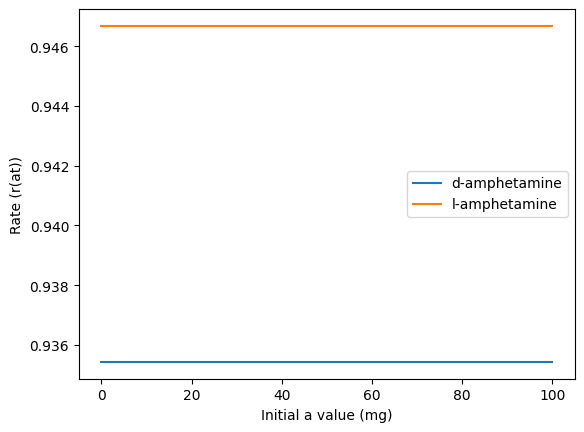

In [ ]:
#This section graphs the rate of elimination of Adderall. It is constant so it is the same for all initial amounts

#This is for the weighted average half-life
halflife = 11
r = np.exp(-np.log(2) / halflife)

'''
r = np.exp(-np.log(2) / halflife)
R_d = []

for i in range(0,1000):
  R.append(r)

x_graph = np.linspace(0,100,1000)
plt.plot(x_graph,R)
'''

#This is for the half-lives of d-AMPH and l-AMPH
halflife_d_amph = 10.385
halflife_l_amph = 12.65
#Rates are defined
r_d_amph = np.exp(-np.log(2) / halflife_d_amph)
r_l_amph = np.exp(-np.log(2) / halflife_l_amph)
R_d = []
R_l = []

for i in range(0,1000):
  R_d.append(r_d_amph)
  R_l.append(r_l_amph)

#Creates plot of both rates
x_graph = np.linspace(0,100,1000)
plt.plot(x_graph,R_d, label = "d-amphetamine")
plt.plot(x_graph,R_l, label = "l-amphetamine")
plt.ylabel("Rate (r(at))")
plt.xlabel("Initial a value (mg)")
plt.legend()

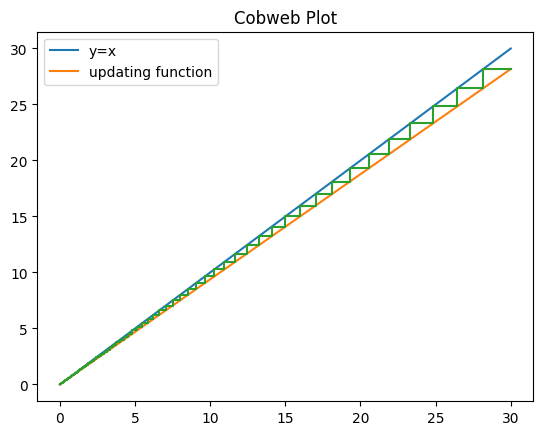

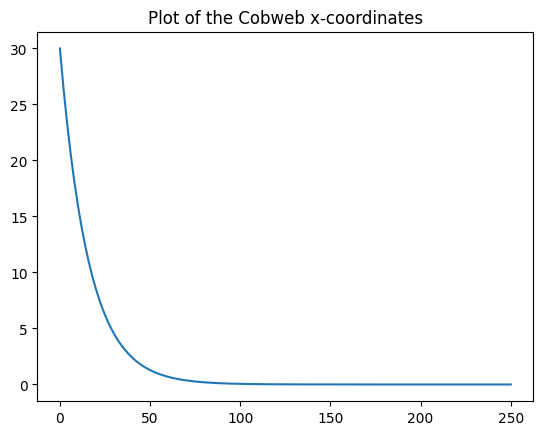

In [ ]:
#This section is not directly included in the documentation. It models the elimination of Adderall with the weighted average half-life

def adderall_updating_approx(x): #Updating function for elimination by hour using weighted average half-life
  return x * r

#Code modified from DTDS lesson
def plot_cobwebbing_approx(f, a0, steps):
    cobwebs_x=[a0] #starting x-value
    cobwebs_y=[f(a0)] #starting y-value

    for i in range(1,steps):
        if i%2==1: #if the step i is odd
            cobwebs_x.append(cobwebs_y[i-1]) #append the same values along the diagonal y=x
            cobwebs_y.append(cobwebs_y[i-1])
        elif i%2==0: #if the step i is even
            cobwebs_x.append(cobwebs_y[i-1]) #append the same x-value, but "move up" to the updating curve.
            cobwebs_y.append(f(cobwebs_x[i]))


    xvalues=np.linspace(0,max(cobwebs_x), 500) #linspace for plotting
    plt.title("Cobweb Plot")
    plt.plot(xvalues,xvalues, label="y=x") #plot the diagonal y=x
    plt.plot(xvalues, f(xvalues), label="updating function") #plot the updating function

    plt.plot(cobwebs_x,cobwebs_y) #plot the cobwebs
    for x,y in zip(list(np.around(np.array(cobwebs_x),2)),list(np.around(np.array(cobwebs_y),2))): #add some labels
        label = f"({x},{y})"

    plt.legend()
    plt.draw()

    plt.figure()

    distinct_solutions=list(OrderedDict.fromkeys(cobwebs_x))#get the x-components of the cobwebs to plot the solution. This orders them and deletes repeats
    plt.title("Plot of the Cobweb x-coordinates")

    plt.plot(list(range(len(distinct_solutions))),distinct_solutions) #plots the solution set.

plot_cobwebbing_approx(adderall_updating_approx, 30, 500) # a0 = 30 mg

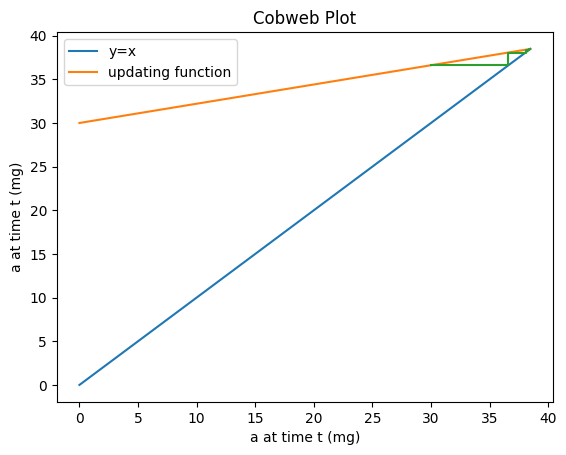

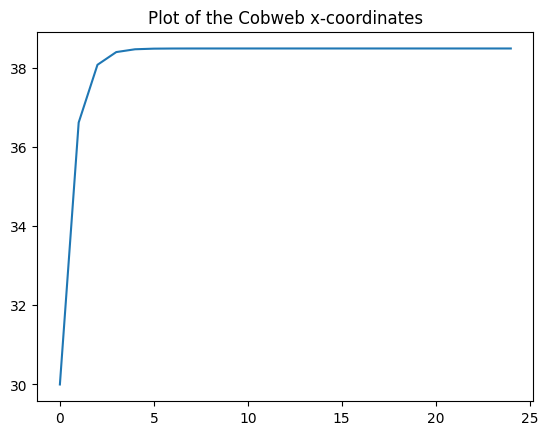

In [ ]:
# This section models the daily maximum amounts of amphetamine based on the approximate half-life
d = 30
r_per_day = np.exp(-24*np.log(2) / halflife)

#Code modified from DTDS lesson
def plot_cobwebbing_plusD_approx(f, a0, steps):
  cobwebs_x=[a0] #starting x-value
  cobwebs_y=[f(a0)] #starting y-value

  for i in range(1,steps):
      if i%2==1: #if the step i is odd
          cobwebs_x.append(cobwebs_y[i-1]) #append the same values along the diagonal y=x
          cobwebs_y.append(cobwebs_y[i-1])
      elif i%2==0: #if the step i is even
          cobwebs_x.append(cobwebs_y[i-1]) #append the same x-value, but "move up" to the updating curve.
          cobwebs_y.append(f(cobwebs_x[i]))

  xvalues=np.linspace(0,max(cobwebs_x), 500) #linspace for plotting
  plt.title("Cobweb Plot")
  plt.plot(xvalues,xvalues, label="y=x") #plot the diagonal y=x
  plt.plot(xvalues, f(xvalues), label="updating function") #plot the updating function

  plt.plot(cobwebs_x,cobwebs_y) #plot the cobwebs
  for x,y in zip(list(np.around(np.array(cobwebs_x),2)),list(np.around(np.array(cobwebs_y),2))): #add some labels
      label = f"({x},{y})"

  plt.ylabel("a at time t (mg)")
  plt.xlabel("a at time t (mg)")

  plt.legend()
  plt.draw()

  plt.figure()

  distinct_solutions=list(OrderedDict.fromkeys(cobwebs_x))#get the x-components of the cobwebs to plot the solution. This orders them and deletes repeats
  plt.title("Plot of the Cobweb x-coordinates")

  plt.plot(list(range(len(distinct_solutions))),distinct_solutions) #plots the solution set.

  plt.draw()

  plt.show()

def adderall_updating_plusD_approx(x):
    return x * r_per_day + d

plot_cobwebbing_plusD_approx(adderall_updating_plusD_approx, 30, 1000)

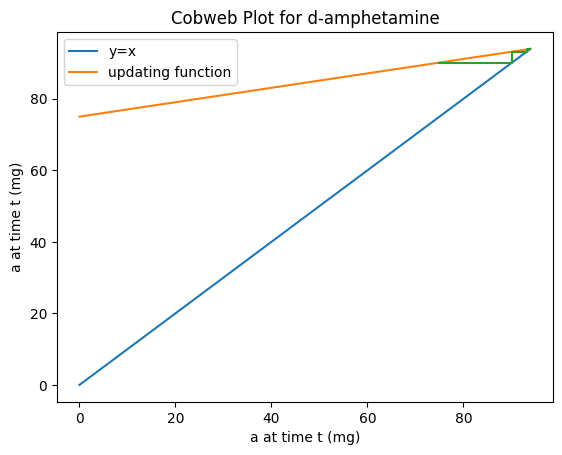

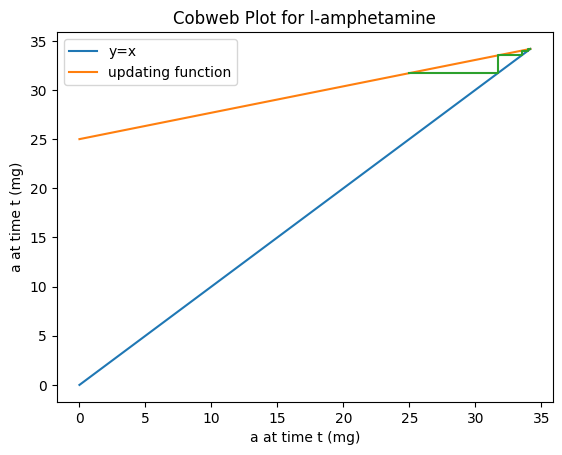

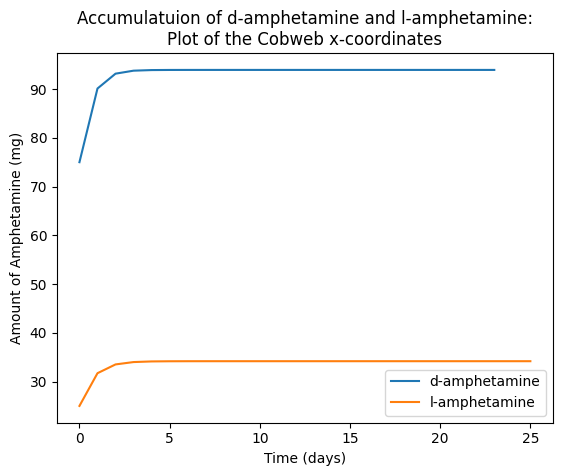

[100.0, 121.82522876607628, 126.67265438781024, 127.77010317903571, 128.0236364562635, 128.08342002486688, 128.0978009449658, 128.10132539463933, 128.10220380640044, 128.10242596923408, 128.10248285913042, 128.1024975772017, 128.1025014166482, 128.10250242486111, 128.10250269098626, 128.1025027615152, 128.102502780265, 128.1025027852614, 128.10250278659527, 128.10250278695182, 128.10250278704723, 128.10250278707278, 128.10250278707963, 128.10250278708148]


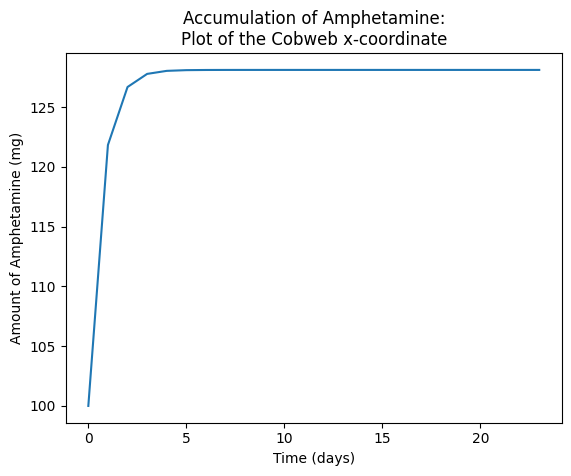

In [ ]:
# This section models the daily maximum amounts of d-AMPH and l-AMPH with doses every 24 hours.

d = 100
# Rates have been modified to account for 24 hour time steps
r_per_day_d = np.exp(-24*np.log(2) / halflife_d_amph)
r_per_day_l = np.exp(-24*np.log(2) / halflife_l_amph)

#Code modified from DTDS lesson
def plot_cobwebbing_exact(f, g, a0, steps): # Has two functions in parameter for the two different updating functions

    d = a0

    #D-AMPH
    cobwebs_d_x=[a0*(3/4)] #starting x-value weighted for ratio of d-AMPH : l-AMPH
    cobwebs_d_y=[f(a0*(3/4))] #starting y-value

    for i in range(1,steps):
        if i%2==1: #if the step i is odd
            cobwebs_d_x.append(cobwebs_d_y[i-1]) #append the same values along the diagonal y=x
            cobwebs_d_y.append(cobwebs_d_y[i-1])
        elif i%2==0: #if the step i is even
            cobwebs_d_x.append(cobwebs_d_y[i-1]) #append the same x-value, but "move up" to the updating curve.
            cobwebs_d_y.append(f(cobwebs_d_x[i]))

    xvalues_d=np.linspace(0,max(cobwebs_d_x), 500) #linspace for plotting
    plt.title("Cobweb Plot for d-amphetamine")
    plt.plot(xvalues_d,xvalues_d, label="y=x") #plot the diagonal y=x
    plt.plot(xvalues_d, f(xvalues_d), label="updating function") #plot the updating function

    plt.plot(cobwebs_d_x,cobwebs_d_y) #plot the cobwebs
    for x,y in zip(list(np.around(np.array(cobwebs_d_x),2)),list(np.around(np.array(cobwebs_d_y),2))):
        label = f"({x},{y})"

    plt.ylabel("a at time t (mg)")
    plt.xlabel("a at time t (mg)")

    plt.legend()
    plt.draw()

    plt.figure()

    #L-AMPH
    cobwebs_l_x=[a0*(1/4)] #starting x-value weighted for ratio of d-AMPH : l-AMPH
    cobwebs_l_y=[g(a0*(1/4))] #starting y-value

    for i in range(1,steps):
        if i%2==1: #if the step i is odd
            cobwebs_l_x.append(cobwebs_l_y[i-1]) #append the same values along the diagonal y=x
            cobwebs_l_y.append(cobwebs_l_y[i-1])
        elif i%2==0: #if the step i is even
            cobwebs_l_x.append(cobwebs_l_y[i-1]) #append the same x-value, but "move up" to the updating curve.
            cobwebs_l_y.append(g(cobwebs_l_x[i]))

    xvalues_l=np.linspace(0,max(cobwebs_l_x), 500) #linspace for plotting
    plt.title("Cobweb Plot for l-amphetamine")
    plt.plot(xvalues_l,xvalues_l, label="y=x") #plot the diagonal y=x
    plt.plot(xvalues_l, g(xvalues_l), label="updating function") #plot the updating function


    plt.plot(cobwebs_l_x,cobwebs_l_y) #plot the cobwebs
    for x,y in zip(list(np.around(np.array(cobwebs_l_x),2)),list(np.around(np.array(cobwebs_l_y),2))):
        label = f"({x},{y})"

    plt.ylabel("a at time t (mg)")
    plt.xlabel("a at time t (mg)")

    plt.legend()
    plt.draw()

    plt.figure()

    #Creates lists of solution sets for d-AMPH and l-AMPH
    distinct_solutions_d=list(OrderedDict.fromkeys(cobwebs_d_x))
    distinct_solutions_l=list(OrderedDict.fromkeys(cobwebs_l_x))

    #Plots both solution sets
    plt.title("Accumulatuion of d-amphetamine and l-amphetamine:\nPlot of the Cobweb x-coordinates")
    plt.ylabel("Amount of Amphetamine (mg)")
    plt.xlabel("Time (days)")

    plt.plot(list(range(len(distinct_solutions_d))),distinct_solutions_d, label="d-amphetamine") #plots the solution set.
    plt.plot(list(range(len(distinct_solutions_l))),distinct_solutions_l, label="l-amphetamine") #plots the solution set.


    plt.legend()

    plt.draw()

    plt.show()

    plt.figure()

    #Plots cumulative solution sets of d-AMPH and l-AMPH together
    plt.title("Accumulation of Amphetamine:\nPlot of the Cobweb x-coordinate")
    plt.ylabel("Amount of Amphetamine (mg)")
    plt.xlabel("Time (days)")

    solutions_together = [] #list of combined solutions
    for i in range(len(distinct_solutions_d)):
      solutions_together.append(distinct_solutions_d[i] + distinct_solutions_l[i]) #appends combination to combined solutions list

    plt.plot(list(range(len(distinct_solutions_d))),solutions_together) #plots the solution set.

    print(solutions_together) #Prints solutions as list

    plt.draw()

    plt.show()

#Updating function for d-AMPH
def adderall_updating_d_plusD(x):
    return x * r_per_day_d + (3/4)*d

#Updating function for l-AMPH
def adderall_updating_l_plusD(x):
    return x * r_per_day_l + (1/4)*d

plot_cobwebbing_exact(adderall_updating_d_plusD, adderall_updating_l_plusD, 100, 50)

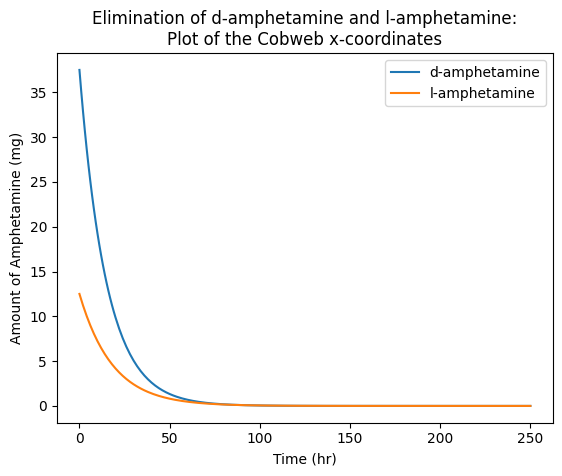

The amount of total amphetamine falls below 1mg at t =  63


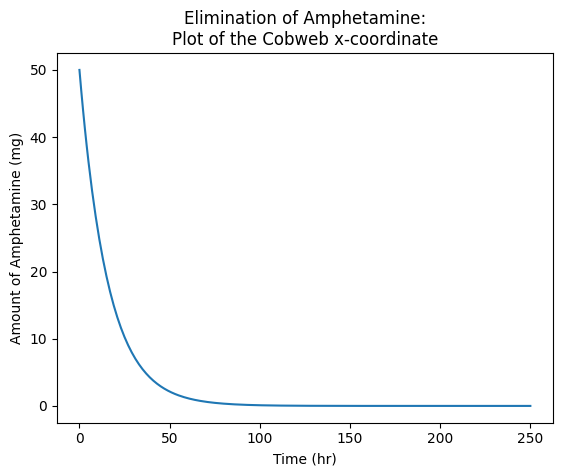

In [ ]:
# This section models the elimination of a single dose of Adderall as d-AMPH and l-AMPH over time (hrs)

def adderall_updating_d(x): # Updating function for d-AMPH
    return x * r_d_amph

def adderall_updating_l(x): # Updating function for l-AMPH
    return x * r_l_amph

#Code modified from DTDS lesson
def plot_cobwebbing_exact_singleDose(f, g, a0, steps,endValue):
    d = a0

    #D-AMPH
    cobwebs_d_x=[a0*(3/4)] #starting x-value weighted for ratio of d-AMPH : l-AMPH
    cobwebs_d_y=[f(a0*(3/4))] #starting y-value

    for i in range(1,steps):
        if i%2==1: #if the step i is odd
            cobwebs_d_x.append(cobwebs_d_y[i-1]) #append the same values along the diagonal y=x
            cobwebs_d_y.append(cobwebs_d_y[i-1])
        elif i%2==0: #if the step i is even
            cobwebs_d_x.append(cobwebs_d_y[i-1]) #append the same x-value, but "move up" to the updating curve.
            cobwebs_d_y.append(f(cobwebs_d_x[i]))
    #No graph, just collects values from cobwebbing

    #L-AMPH
    cobwebs_l_x=[a0*(1/4)] #starting x-value weighted for ratio of d-AMPH : l-AMPH
    cobwebs_l_y=[g(a0*(1/4))] #starting y-value

    for i in range(1,steps):
        if i%2==1: #if the step i is odd
            cobwebs_l_x.append(cobwebs_l_y[i-1]) #append the same values along the diagonal y=x
            cobwebs_l_y.append(cobwebs_l_y[i-1])
        elif i%2==0: #if the step i is even
            cobwebs_l_x.append(cobwebs_l_y[i-1]) #append the same x-value, but "move up" to the updating curve.
            cobwebs_l_y.append(g(cobwebs_l_x[i]))
    #No graph, just collects values from cobwebbing

    #Plots d-AMPH and l-AMPH hourly elimination
    distinct_solutions_d=list(OrderedDict.fromkeys(cobwebs_d_x))#get the x-components of the cobwebs to plot the solution. This orders them and deletes repeats
    distinct_solutions_l=list(OrderedDict.fromkeys(cobwebs_l_x))#get the x-components of the cobwebs to plot the solution. This orders them and deletes repeats

    plt.title("Elimination of d-amphetamine and l-amphetamine:\nPlot of the Cobweb x-coordinates")
    plt.ylabel("Amount of Amphetamine (mg)")
    plt.xlabel("Time (hr)")

    plt.plot(list(range(len(distinct_solutions_d))),distinct_solutions_d, label="d-amphetamine")
    plt.plot(list(range(len(distinct_solutions_l))),distinct_solutions_l, label="l-amphetamine")

    plt.legend()

    plt.draw()

    plt.show()

    plt.figure()

    #Plots the total elimination curves for amphetamine
    plt.title("Elimination of Amphetamine:\nPlot of the Cobweb x-coordinate")
    plt.ylabel("Amount of Amphetamine (mg)")
    plt.xlabel("Time (hr)")

    solutions_together = []
    for i in range(len(distinct_solutions_d)):
      solutions_together.append(distinct_solutions_d[i] + distinct_solutions_l[i]) #Appends combination of two solution lists for each index i

    plt.plot(list(range(len(distinct_solutions_d))),solutions_together) #plots the solution set.

    for i in range(len(solutions_together)):
      if solutions_together[i] < endValue:
        #plt.annotate(str([i,solutions_together[i]]),[i,solutions_together[i]]) #Plots a point where the amount of Adderall falls below the inputted end value
        print("The amount of total amphetamine falls below 1mg at t = ", i) #Prints out time where the amount of Adderall falls below the inputted end value
        break;

    plt.draw()

    plt.show()

plot_cobwebbing_exact_singleDose(adderall_updating_d, adderall_updating_l, 50, 500, 1) #a0 = 50 mg

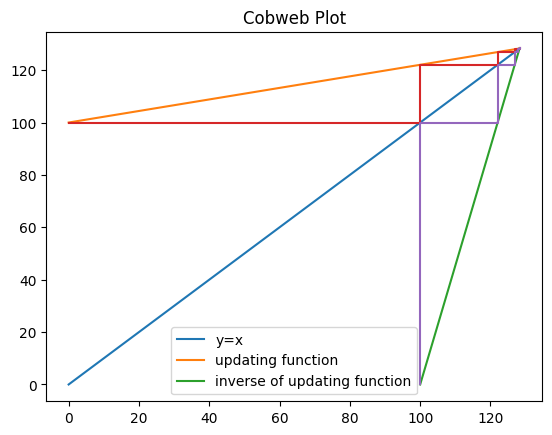

In [ ]:
#This section compares the updating function and its cobwebbing to its inverse and its cobwebbing to help visualize the information that the inverse tells us
#Code modified from DTDS lesson
def plot_cobwebbing_with_inverse(f, a0, steps):

    #Updating function
    cobwebs_x=[a0] #starting x-value
    cobwebs_y=[f(a0)] #starting y-value

    #Inverse function, x and y swapped
    cobwebs_x_inverse=[f(a0)] #starting x-value
    cobwebs_y_inverse=[a0] #starting y-value

    for i in range(1,steps):
        if i%2==1: #if the step i is odd
            #Updating function
            cobwebs_x.append(cobwebs_y[i-1])
            cobwebs_y.append(cobwebs_y[i-1])
            #Inverse
            cobwebs_y_inverse.append(cobwebs_y[i-1])
            cobwebs_x_inverse.append(cobwebs_y[i-1])
        elif i%2==0: #if the step i is even
            #Updating function
            cobwebs_x.append(cobwebs_y[i-1])
            cobwebs_y.append(f(cobwebs_x[i]))
            #Inverse: x and y swapped
            cobwebs_y_inverse.append(cobwebs_y[i-1])
            cobwebs_x_inverse.append(f(cobwebs_y[i-1]))

    #Plots the updating function, its cobwebbing, the inverse, and its cobwebbing
    xvalues=np.linspace(0,max(cobwebs_x), 500) #linspace for plotting
    plt.title("Cobweb Plot")
    plt.plot(xvalues,xvalues, label="y=x") #plot the diagonal y=x
    plt.plot(xvalues, f(xvalues), label="updating function") #plot the updating function
    plt.plot(f(xvalues), xvalues, label="inverse of updating function") #plot the inverse

    plt.plot(cobwebs_x,cobwebs_y) #plot the cobwebs
    for x,y in zip(list(np.around(np.array(cobwebs_x),2)),list(np.around(np.array(cobwebs_y),2))): #add some labels
        label = f"({x},{y})"

    plt.plot(cobwebs_x_inverse,cobwebs_y_inverse) #plot the cobwebs for the inverse
    for x,y in zip(list(np.around(np.array(cobwebs_x_inverse),2)),list(np.around(np.array(cobwebs_y_inverse),2))): #add some labels
        label = f"({x},{y})"

    plt.legend()
    plt.draw()

plot_cobwebbing_with_inverse(adderall_updating_plusD_approx, 0, 100) #a0 = 0 mg, d = 100
